In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [2]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy(predictions, targets):
    N = predictions.shape[0]
    ce = -np.sum(targets * np.log(predictions + 1e-9)) / N
    return ce

def cross_entropy_derivative(predictions, targets):
    return predictions - targets

def create_batches(X, y, batch_size):
    m = X.shape[0]
    batches = []
    permutation = np.random.permutation(m)
    X_shuffled = X[permutation]
    y_shuffled = y[permutation]
    num_complete_batches = m // batch_size
    for k in range(num_complete_batches):
        batch_X = X_shuffled[k * batch_size : k * batch_size + batch_size]
        batch_y = y_shuffled[k * batch_size : k * batch_size + batch_size]
        batch = (batch_X, batch_y)
        batches.append(batch)
    if m % batch_size != 0:
        batch_X = X_shuffled[num_complete_batches * batch_size :]
        batch_y = y_shuffled[num_complete_batches * batch_size :]
        batch = (batch_X, batch_y)
        batches.append(batch)
    return batches

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
        self.bias_output = np.zeros((1, output_size))
        self.learning_rate = learning_rate

    def forward(self, x):
        self.z_hidden = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.a_hidden = relu(self.z_hidden)
        self.z_output = np.dot(self.a_hidden, self.weights_hidden_output) + self.bias_output
        self.a_output = softmax(self.z_output)
        return self.a_output

    def backward(self, x, y):
        m = x.shape[0]
        dZ_output = cross_entropy_derivative(self.a_output, y)
        dW_hidden_output = (1/m) * np.dot(self.a_hidden.T, dZ_output)
        db_output = (1/m) * np.sum(dZ_output, axis=0, keepdims=True)
        dA_hidden = np.dot(dZ_output, self.weights_hidden_output.T)
        dZ_hidden = dA_hidden * relu_derivative(self.z_hidden)
        dW_input_hidden = (1/m) * np.dot(x.T, dZ_hidden)
        db_hidden = (1/m) * np.sum(dZ_hidden, axis=0, keepdims=True)
        self.weights_hidden_output -= self.learning_rate * dW_hidden_output
        self.bias_output -= self.learning_rate * db_output
        self.weights_input_hidden -= self.learning_rate * dW_input_hidden
        self.bias_hidden -= self.learning_rate * db_hidden

    def train(self, x, y, epochs, batch_size):
        for epoch in range(epochs):
            start_time = time.time()

            batches = create_batches(x, y, batch_size)
            for batch_X, batch_y in batches:
                predictions = self.forward(batch_X)
                loss = cross_entropy(predictions, batch_y)
                self.backward(batch_X, batch_y)

            epoch_time = time.time() - start_time
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Time: {epoch_time:.2f} seconds")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Тренировочные данные:


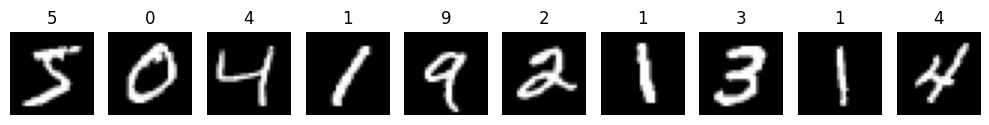

Тестовые данные:


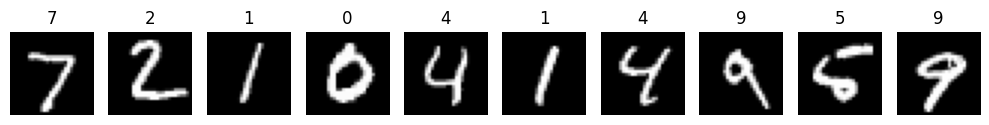

Размерность x_train: (60000, 28, 28)
Размерность y_train: (60000,)
Размерность x_test: (10000, 28, 28)
Размерность y_test: (10000,)


In [3]:
# Загрузка данных
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Визуализация данных
print(f"Тренировочные данные:")
fig, axes = plt.subplots(1, 10, figsize=(10, 5))
for ax, image, label in zip(axes, x_train, y_train):
    ax.set_title(label)
    ax.imshow(image, cmap="gray")
    ax.axis("off")
plt.tight_layout()
plt.show()

print(f"Тестовые данные:")
fig, axes = plt.subplots(1, 10, figsize=(10, 5))
for ax, image, label in zip(axes, x_test, y_test):
    ax.set_title(label)
    ax.imshow(image, cmap="gray")
    ax.axis("off")
plt.tight_layout()
plt.show()

# Проверка размерностей
print(f"Размерность x_train: {x_train.shape}")
print(f"Размерность y_train: {y_train.shape}")
print(f"Размерность x_test: {x_test.shape}")
print(f"Размерность y_test: {y_test.shape}")

In [4]:
# Предобработка данных
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]

# Настройка параметров
learning_rate = 0.1
hidden_neurons = 300
epochs = 20
batch_size = 64

# Обучение нейронной сети
nn_mnist = NeuralNetwork(input_size=28*28, hidden_size=hidden_neurons, output_size=10, learning_rate=learning_rate)
nn_mnist.train(x_train_flatten, y_train_onehot, epochs, batch_size)

Epoch 1/20, Loss: 0.3048, Time: 5.43 seconds
Epoch 2/20, Loss: 0.1074, Time: 4.00 seconds
Epoch 3/20, Loss: 0.2046, Time: 7.57 seconds
Epoch 4/20, Loss: 0.0366, Time: 4.26 seconds
Epoch 5/20, Loss: 0.0561, Time: 4.98 seconds
Epoch 6/20, Loss: 0.1007, Time: 5.82 seconds
Epoch 7/20, Loss: 0.0948, Time: 4.01 seconds
Epoch 8/20, Loss: 0.0590, Time: 5.31 seconds
Epoch 9/20, Loss: 0.0778, Time: 5.11 seconds
Epoch 10/20, Loss: 0.2474, Time: 4.13 seconds
Epoch 11/20, Loss: 0.1596, Time: 6.10 seconds
Epoch 12/20, Loss: 0.0327, Time: 4.41 seconds
Epoch 13/20, Loss: 0.0314, Time: 4.07 seconds
Epoch 14/20, Loss: 0.0302, Time: 5.97 seconds
Epoch 15/20, Loss: 0.0508, Time: 4.18 seconds
Epoch 16/20, Loss: 0.0072, Time: 4.15 seconds
Epoch 17/20, Loss: 0.0216, Time: 6.44 seconds
Epoch 18/20, Loss: 0.0142, Time: 4.12 seconds
Epoch 19/20, Loss: 0.0273, Time: 4.22 seconds
Epoch 20/20, Loss: 0.0200, Time: 6.83 seconds


In [5]:
# Тестирование нейронной сети
predictions = nn_mnist.forward(x_test_flatten)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = np.mean(predicted_labels == y_test) * 100
print(f"Accuracy on test data: {accuracy:.2f}%")

Accuracy on test data: 98.05%
